In [1]:
import IPython.core.display as di

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Mostrar c&oacute;digo</button>''', raw=True)


Mostrar código

# Problema 1

<div>
Fuente: S.J. Chapman, "Máquinas eléctricas", 5ºEd. McGrawHill. </div>

Un sistema de potencia monofásico consta de un generador de 480 V y 60 Hz que suministra potencia a una carga Zcarga = 4 + j3 $\Omega$ a través de una línea de transmisión de impedancia Zlínea = 0.18 + j0.24 $\Omega$. Conteste las siguientes preguntas sobre el sistema.

a) Si el sistema de potencia es exactamente como se describe en la figura 1, ¿cuál será el voltaje en la carga? ¿Cuáles serán las pérdidas en la línea de transmisión?



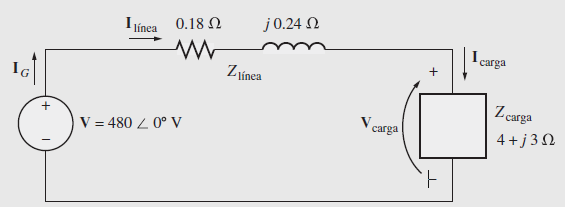

In [9]:
from IPython.display import Image
Image(filename="./img/p1f1.png")

b) Suponga que un transformador elevador 1:10 se coloca en el extremo del generador de la línea de transmisión y que un transformador reductor 10:1 se coloca en el extremo de carga de la línea de transmisión. ¿Cuál será ahora el voltaje de la carga? ¿Cuáles serán las pérdidas en la línea de transmisión?

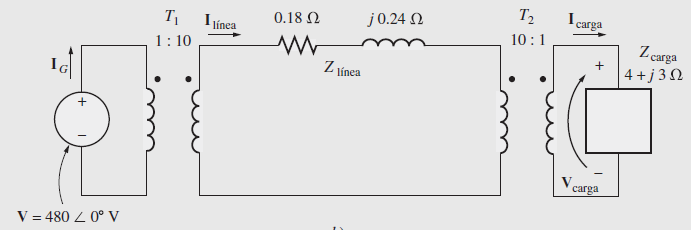

In [10]:
from IPython.display import Image
Image(filename="./img/p1f2.png")

---
# Problema 2

<div>
Fuente: S.J. Chapman, "Máquinas eléctricas", 5ºEd. McGrawHill. </div>

Se requiere determinar las impedancias del circuito equivalente de un transformador de 20 kVA, 8000/240
V, 60 Hz. El ensayo de circuito abierto se realizó en el circuito secundario del transformador
(para reducir el voltaje máximo que se tenía que medir), y el ensayo de cortocircuito se realizó en el lado
primario del transformador (para reducir la máxima corriente que se tenía que medir). Se tomaron los
siguientes datos:



 <table border="1" style="width:70%">
  <tr>
    <td>Ensayo circuito abierto</td>
    <td>Ensayo cortocircuito</td>
  </tr>
  <tr>
    <td>$V_{ca}=240$ V</td>
    <td>$V_{cc}=489$ V</td>
  </tr>
  <tr>
    <td>$I_{ca}=7.133$ A</td>
    <td>$I_{cc}=2.5$ A</td>
  </tr>
  <tr>
    <td>$P_{ca}=400$ W</td>
    <td>$P_{cc}=240$ W</td>
  </tr>
</table> 

In [4]:
# SOLUCIÓN

import numpy as np

rt = 8000/240

# Rama de vacío. Medidas en el secundario (BT):
Vca = 240.0 # V
Ica = 7.133 # A
Pca = 400.0 # W

# Rama de cortocircuito. Medidas en el primario (AT):
Vcc = 489.0 # V
Icc = 2.5 # A 
Pcc = 240.0 # W

# Parámetros de la rama de vacío:
Y_0 = Ica/Vca
phi_0 = np.arccos(Pca/(Vca*Ica))
# R_fe, X_m
R_fe = 1./(Y_0*np.cos(phi_0))
X_m = 1./(Y_0*np.sin(phi_0))

# Parámetros de la rama de cortocircuito:
Z_cc = Vcc/Icc
phi_cc = np.arccos(Pcc/(Vcc*Icc))
# R_cc, X_cc
R_cc = Z_cc*np.cos(phi_cc)
X_cc = Z_cc*np.sin(phi_cc)

print ("R_fe (BT) = {:.2f} Ω --> R_fe (AT) = {:.2f} Ω".format(R_fe, R_fe*rt**2))
print ("X_m (BT) = {:.2f} Ω --> X_m (AT) = {:.2f} Ω".format(X_m, X_m*rt**2))
print ("R_cc (AT) = {:.2f} Ω".format(R_cc))
print ("X_cc (AT) = {:.2f} Ω".format(X_cc))

R_fe (BT) = 144.00 Ω --> R_fe (AT) = 160000.00 Ω
X_m (BT) = 34.60 Ω --> X_m (AT) = 38449.22 Ω
R_cc (AT) = 38.40 Ω
X_cc (AT) = 191.79 Ω


---
# Problema 3

Para una aplicación se necesita emplear un transformador de media a baja tensión de 630 kVA. Se dispone de los datos del fabricante (tabla). Responder, usando los datos de la tabla, las siguientes cuestiones:

a) ¿Cuánto vale la impedancia de cortocircuito del transformador?

b) Si el transformador trabaja a media carga alimentando una impedancia de factor de potencia 0.8 inductivo, ¿qué valor tiene la regulación? ¿y si trabja a plena carga con factor de potencia 0.6 capacitivo?

c) ¿cuánto vale el rendimiento del transformador en las dos situaciones anteriores?


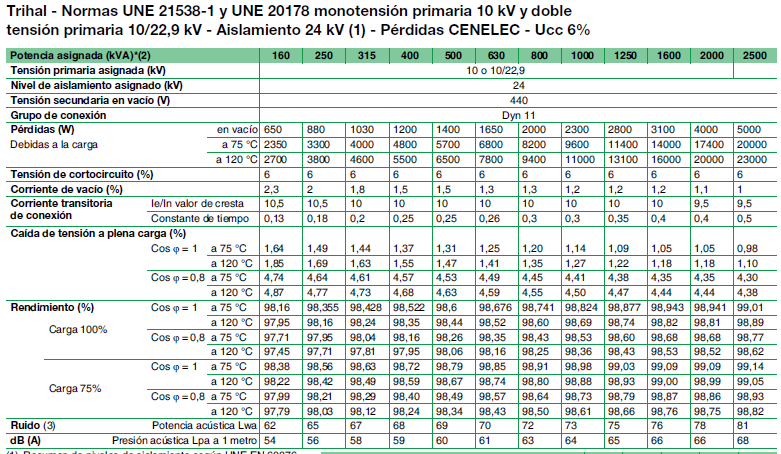

In [6]:
from IPython.display import Image
Image(filename="./img/Datos_Trihal.png")

In [11]:
# SOLUCIÓN
import numpy as np
# Datos
Sn = 630.0e3 #VA
U1n = 22.9e3 #V
U2n = 440.0 #V
Ucc = 0.06

# corriente nominal primario y secundario
I1n = Sn/np.sqrt(3)/U1n
I2n = Sn/np.sqrt(3)/U2n
# Impedancia de cc (referida al primario)
Zcc = Ucc*(U1n/np.sqrt(3))/I1n
# Resistencia de cc (referida al primario) => Pj(plena carga:tabla) = 6800 W
Pj = 6800.
Rcc = (Pj/3)/I1n**2
# Xcc
Xcc = np.sqrt(Zcc**2 - Rcc**2)
phi_cc = np.arccos(Rcc/Zcc)

print ("I1n = {:.2f} A / I2n = {:.2f}".format(I1n,I2n))
print ("Rcc = {:.2f}".format(Rcc))
print ("Xcc = {:.1f}".format(Xcc))
print ("Zcc = {:.3f} ángulo = {:.3f} rad".format(Zcc,phi_cc))

# Pérdidas en vacío (tabla): 1650 W
P_fe = 1650.0 #W

# función para calcular la regulación, la tensión en la carga y el rendimiento
def reg_rto(c,fp,Ucc=Ucc,phi_cc=phi_cc,I2n=I2n,P_fe=P_fe,Pj=Pj):
    if fp >= 0:
        regul = c*Ucc*np.cos(phi_cc-np.arccos(fp))
    else:
        regul = c*Ucc*np.cos(phi_cc+np.arccos(fp))
    U2 = U2n - regul*U2n
    rto = (np.sqrt(3)*c*U2*I2n*np.abs(fp))/(np.sqrt(3)*c*U2*I2n*np.abs(fp) + P_fe + c**2*Pj)
    return regul, U2, rto

print ("\n")
print ("Funcionamiento a media carga (c=0.5) alimentando una impedancia de factor de potencia 0.8 inductivo:")
print ("Regulación = {:.3f}".format(reg_rto(0.5,0.8)[0]))
print ("Tensión en la carga: U2 = {:.1f} V".format(reg_rto(0.5,0.8)[1]))
print ("Rendimiento = {:.3f}".format(reg_rto(0.5,0.8)[2]))
print ("\n")
print ("Funcionamento a plena carga (c=1.0) alimentando una impedancia de factor de potencia 0.6 capacitivo:")
print ("Regulación = {:.3f}".format(reg_rto(1.0,-0.6)[0]))
print ("Tensión en la carga: U2 = {:.1f} V".format(reg_rto(1.0,-0.6)[1]))
print ("Rendimiento = {:.3f}".format(reg_rto(0.5,-0.6)[2]))


I1n = 15.88 A / I2n = 826.66
Rcc = 8.98
Xcc = 49.1
Zcc = 49.944 ángulo = 1.390 rad


Funcionamiento a media carga (c=0.5) alimentando una impedancia de factor de potencia 0.8 inductivo:
Regulación = 0.022
Tensión en la carga: U2 = 430.3 V
Rendimiento = 0.987


Funcionamento a plena carga (c=1.0) alimentando una impedancia de factor de potencia 0.6 capacitivo:
Regulación = -0.054
Tensión en la carga: U2 = 463.6 V
Rendimiento = 0.983


---
# Problema 4

Se va a probar un transformador de 15 kVA y 2300/230 V para determinar los componentes de la rama de magnetización, las impedancias serie y la regulación de tensión. Se realizan los ensayos y se obtienen las mediciones siguientes:

| Ensayo circuito abierto (lado BT) | Ensayo cortocircuito (lado AT) |
|-----------------------------------|--------------------------------|
| $V_{ca}=230$ V                    | $V_{cc}=47$ V                  |
| $I_{ca}=2.1$ A                    | $I_{cc}=6.0$ A                 |
| $P_{ca}=50$ W                     | $P_{cc}=160$ W                 |

Con estos datos, calcular:

1. Circuito equivalente del transformador referido a los lados de AT y BT
2. La regulación de voltaje y el rendimiento cuando el transformador trabaja a plena carga en las siguientes situaciones:

    a. carga con factor de potencia 0.8 inductivo

    b. carga con factor de potencia 1
    
    c. carga con factor de potencia 0.8 capacitivo